<a href="https://colab.research.google.com/github/spandangupta/Data602-Data-Analysis-Machine-Learning-Practice/blob/master/BreastCancer_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get -qq install -y graphviz && pip install -q pydot
!pip install graphviz
!pip install pydot
!pip install pydotplus

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot
from matplotlib import pyplot
from matplotlib import pylab
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
#some new tricks
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from pydot import graph_from_dot_data

In [ ]:
data=datasets.load_breast_cancer()
print(data.DESCR)

In [ ]:
data

In [ ]:
breastcancer_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])

In [ ]:
breastcancer_df=shuffle(pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target']),random_state = 1)

In [ ]:
breastcancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,18.34,114.10,809.2,0.1312,0.36350,0.3219,0.11080,0.2827,0.09208,1.0
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,27.95,102.80,759.4,0.1786,0.41660,0.5006,0.20880,0.3900,0.11790,0.0
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,19.93,88.81,585.4,0.1483,0.20680,0.2241,0.10560,0.3380,0.09584,1.0
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,26.36,139.20,1410.0,0.1234,0.24450,0.3538,0.15710,0.3206,0.06938,0.0
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,36.91,110.10,931.4,0.1148,0.09866,0.1547,0.06575,0.3233,0.06165,0.0


In [ ]:
breastcancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


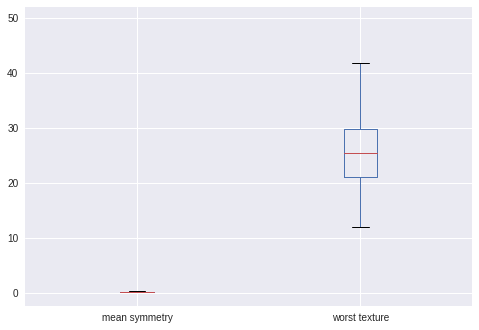

In [ ]:
breastcancer_df[['mean symmetry','worst texture']].plot.box()


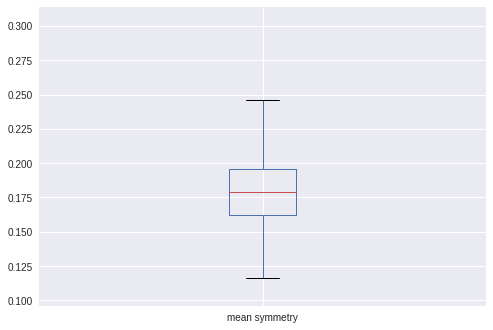

In [ ]:
breastcancer_df['mean symmetry'].plot.box()

In [ ]:
#breastcancer_df.plot.box()

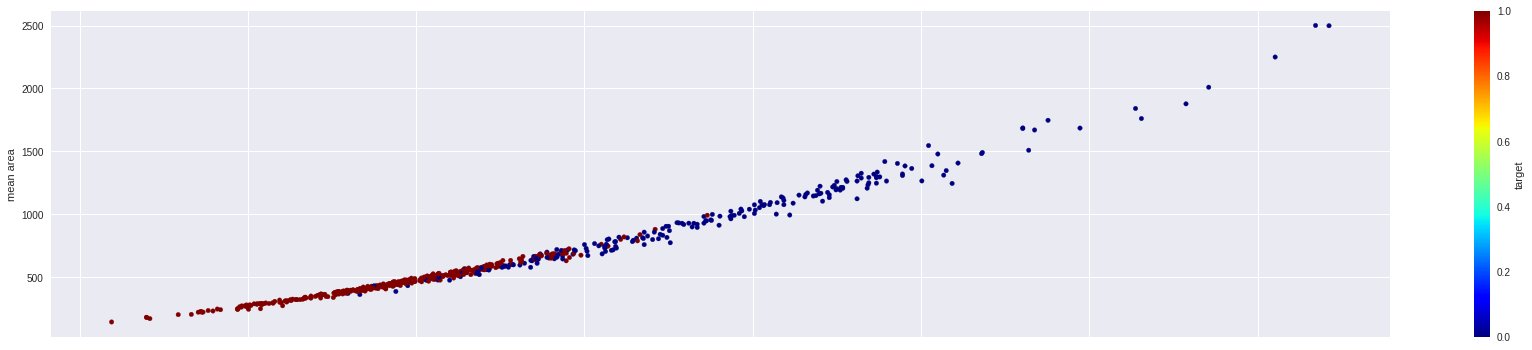

In [ ]:
breastcancer_df.plot.scatter(x='mean perimeter',y ='mean area', c='target',cmap='jet', figsize=(30, 6))

In [ ]:
train_df, test_df= train_test_split(breastcancer_df, random_state=3)

In [ ]:
bcancertree = DecisionTreeClassifier()
#tree.criterion = 'entropy'
bcancertree.fit(train_df.drop('target', axis=1), train_df['target'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
sum(bcancertree.predict(test_df.drop('target',axis=1))==test_df['target'])

126

In [ ]:
confusion_matrix(bcancertree.predict(test_df.drop('target',axis=1)),test_df['target'])

array([[49, 11],
       [ 6, 77]])

In [ ]:
bcancertree.feature_importances_

array([0.0067246 , 0.00317372, 0.00986656, 0.        , 0.        ,
       0.        , 0.        , 0.00756517, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00156655,
       0.00328813, 0.0100475 , 0.        , 0.13621441, 0.0067246 ,
       0.        , 0.00840575, 0.79660026, 0.00982274, 0.        ])

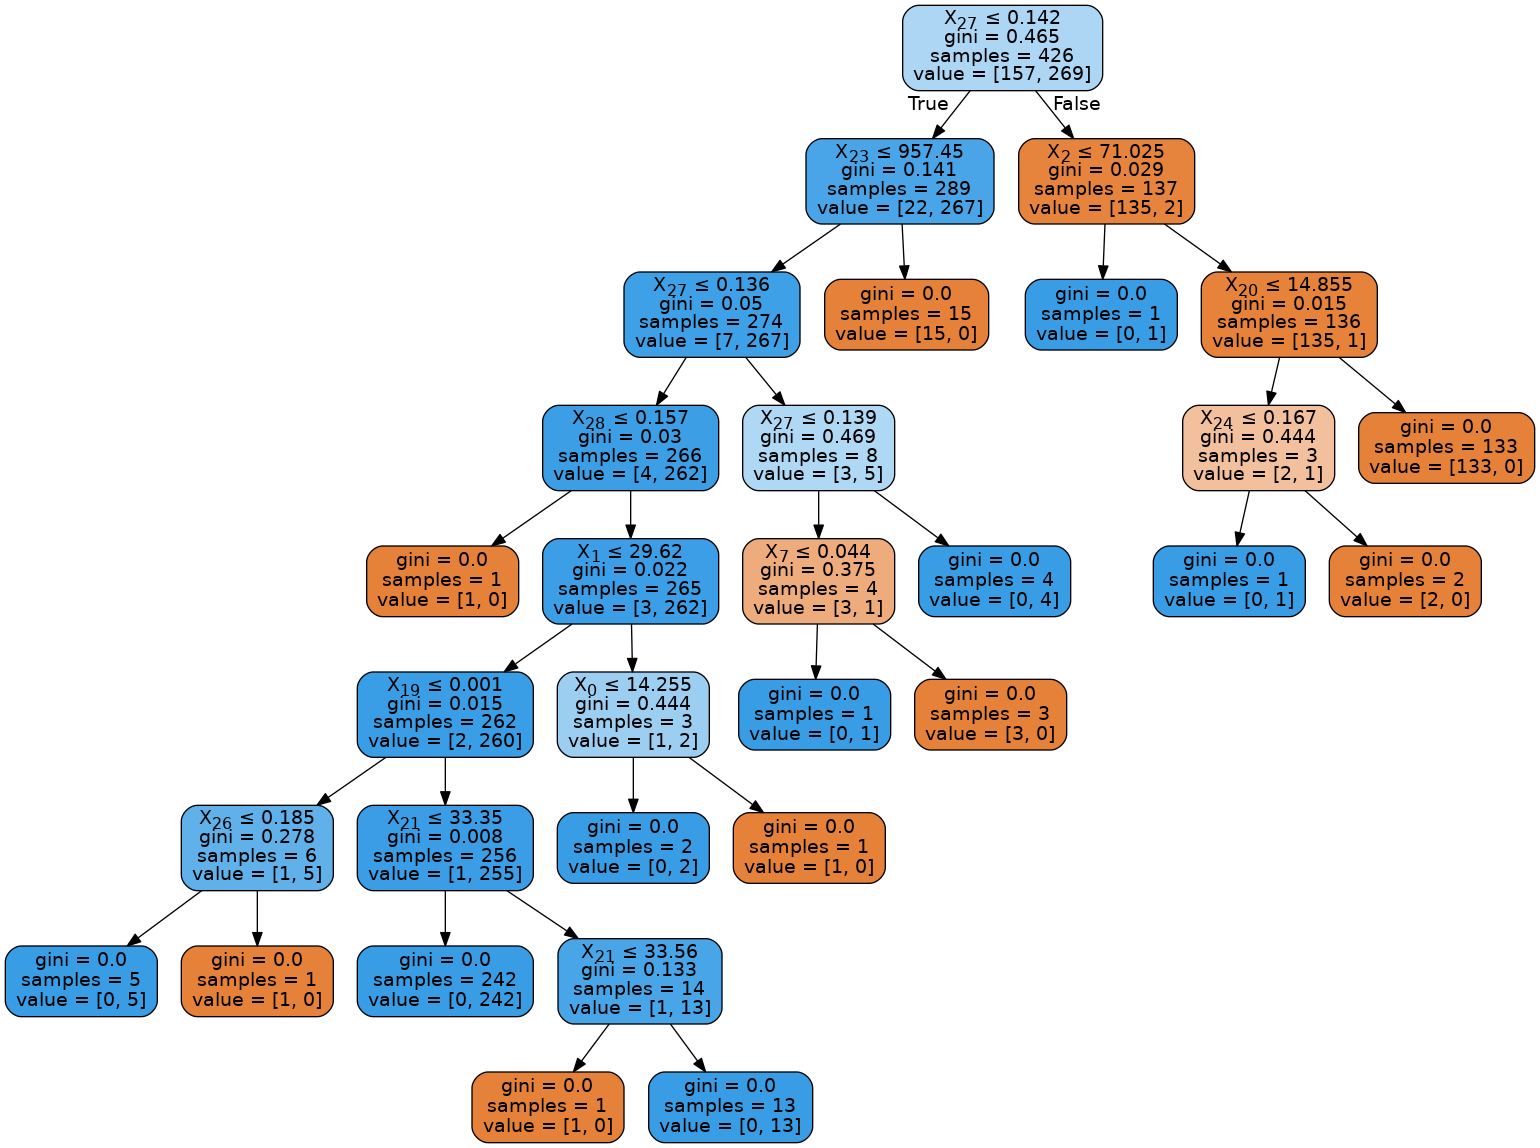

In [ ]:
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image  

path=StringIO()
export_graphviz(bcancertree, out_file=path,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(path.getvalue())
Image(graph.create_png())

In [ ]:
mat=bcancertree.decision_path(test_df.iloc[4].drop('target').values.reshape(1,-1))
print(test_df.iloc[4].drop('target'))
print(mat)

mean radius                  8.671000
mean texture                14.450000
mean perimeter              54.420000
mean area                  227.200000
mean smoothness              0.091380
mean compactness             0.042760
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.172200
mean fractal dimension       0.067240
radius error                 0.220400
texture error                0.787300
perimeter error              1.435000
area error                  11.360000
smoothness error             0.009172
compactness error            0.008007
concavity error              0.000000
concave points error         0.000000
symmetry error               0.027110
fractal dimension error      0.003399
worst radius                 9.262000
worst texture               17.040000
worst perimeter             58.360000
worst area                 259.200000
worst smoothness             0.116200
worst compactness            0.070570
worst concav

In [ ]:
bcancertree.predict(test_df.drop('target',axis=1))==test_df['target']

12      True
148    False
118     True
216     True
175     True
109     True
486    False
105     True
291    False
145     True
9       True
542     True
417     True
448     True
166     True
427     True
301     True
99      True
11      True
317     True
233     True
378     True
68      True
183     True
90      True
110     True
347     True
185     True
440     True
230     True
       ...  
522     True
174     True
168     True
220     True
100    False
81     False
243     True
491    False
133    False
89      True
15      True
566     True
307     True
158     True
372     True
198     True
112    False
306     True
250     True
240     True
96      True
50      True
336     True
297    False
126    False
473     True
261     True
322     True
341     True
502     True
Name: target, Length: 143, dtype: bool

In [ ]:
bcancertree.predict_proba(test_df.iloc[21:27].drop('target',axis=1))

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [ ]:
lr = LogisticRegression()
lr.fit(train_df.drop('target', axis=1), train_df['target'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
sum(lr.predict(test_df.drop('target',axis=1))==test_df['target'])

134

In [ ]:
confusion_matrix(lr.predict(test_df.drop('target',axis=1)),test_df['target'])

array([[50,  4],
       [ 5, 84]])

In [ ]:
lr.predict_proba(test_df.iloc[4].drop('target').values.reshape(1,-1))

array([[1.09266370e-04, 9.99890734e-01]])